In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Mall_Customers.csv')

In [31]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<AxesSubplot: title={'center': 'Unclustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

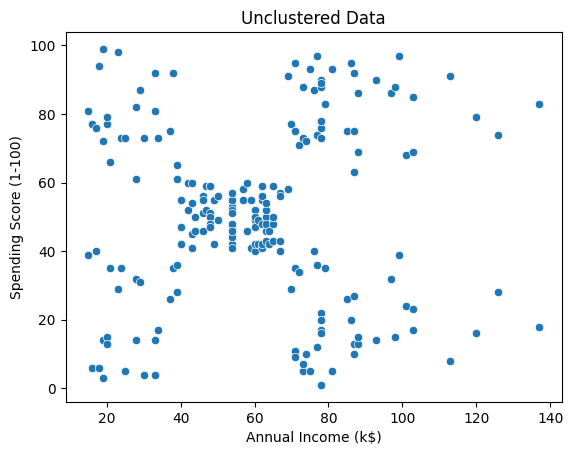

In [33]:
plt.title('Unclustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [35]:
km = KMeans(n_clusters=4)
km.fit_predict(x)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [36]:
#sse
km.inertia_

73679.78903948837

In [37]:
sse =[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [38]:
sse

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30273.39431207004,
 25018.576334776335,
 21818.11458845218,
 19653.383606248826,
 17511.7418692661,
 16279.392149386256,
 14367.900783072086,
 13049.753073712003,
 11932.280630643867]

KeyError: 'x'

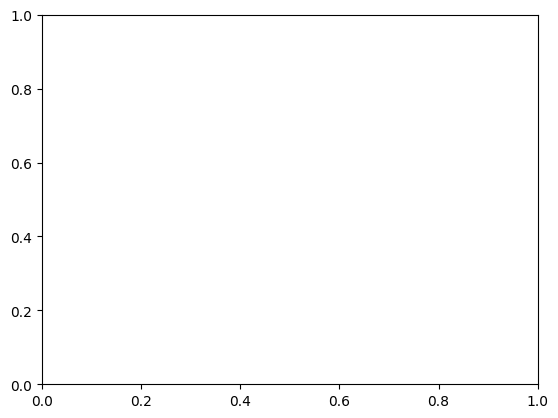

In [39]:
sns.lineplot(range(1,16),y = sse)
plt.xlabel('Cluster')
plt.ylabel('SSE')

In [40]:
#Method second or alternative for elbow method
from sklearn.metrics import silhouette_score

In [41]:
silh =[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [42]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5321706886465517,
 0.45547364483254993,
 0.46013344385649446,
 0.44844327163062,
 0.4351126107313867,
 0.40696237852815614,
 0.4325293847024132,
 0.4365848639203027,
 0.429355871433099]

KeyError: 'x'

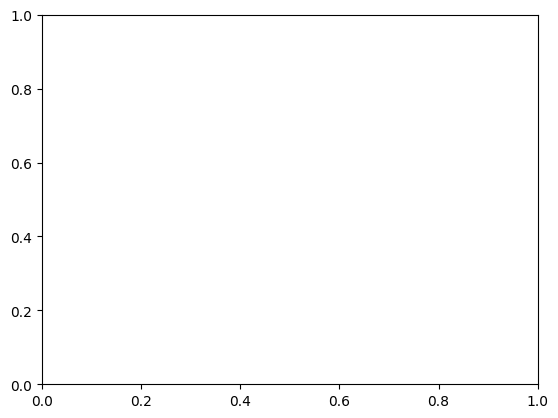

In [43]:
sns.lineplot(range(2,16),y = silh)
plt.xlabel('Cluster')
plt.ylabel('silh')

<BarContainer object of 14 artists>

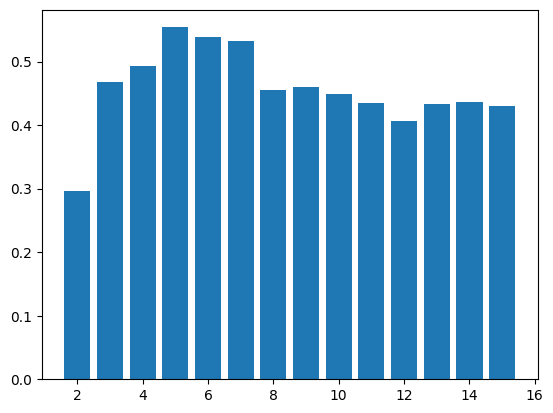

In [44]:
plt.bar(range(2,16,1),silh)

In [45]:
km = KMeans(n_clusters=5,random_state=1)

In [46]:
labels = km.fit_predict(x)


In [47]:
km.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [48]:
cent = km.cluster_centers_

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

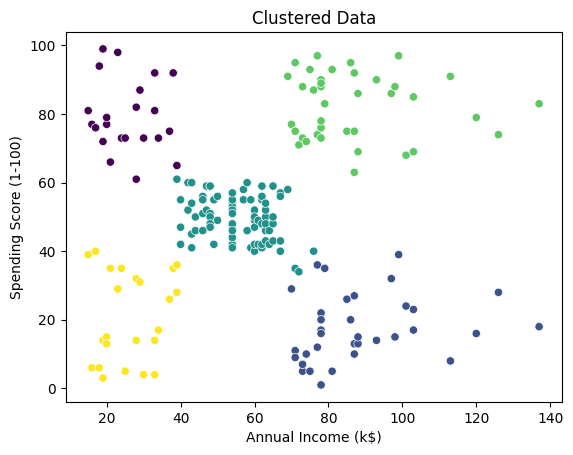

In [49]:
plt.title('Clustered Data')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0],cent[:,1], s=200, color='red')



In [50]:
df[labels==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [51]:
agl = AgglomerativeClustering(n_clusters=5)

In [52]:
alabels = agl.fit_predict(x)

In [53]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

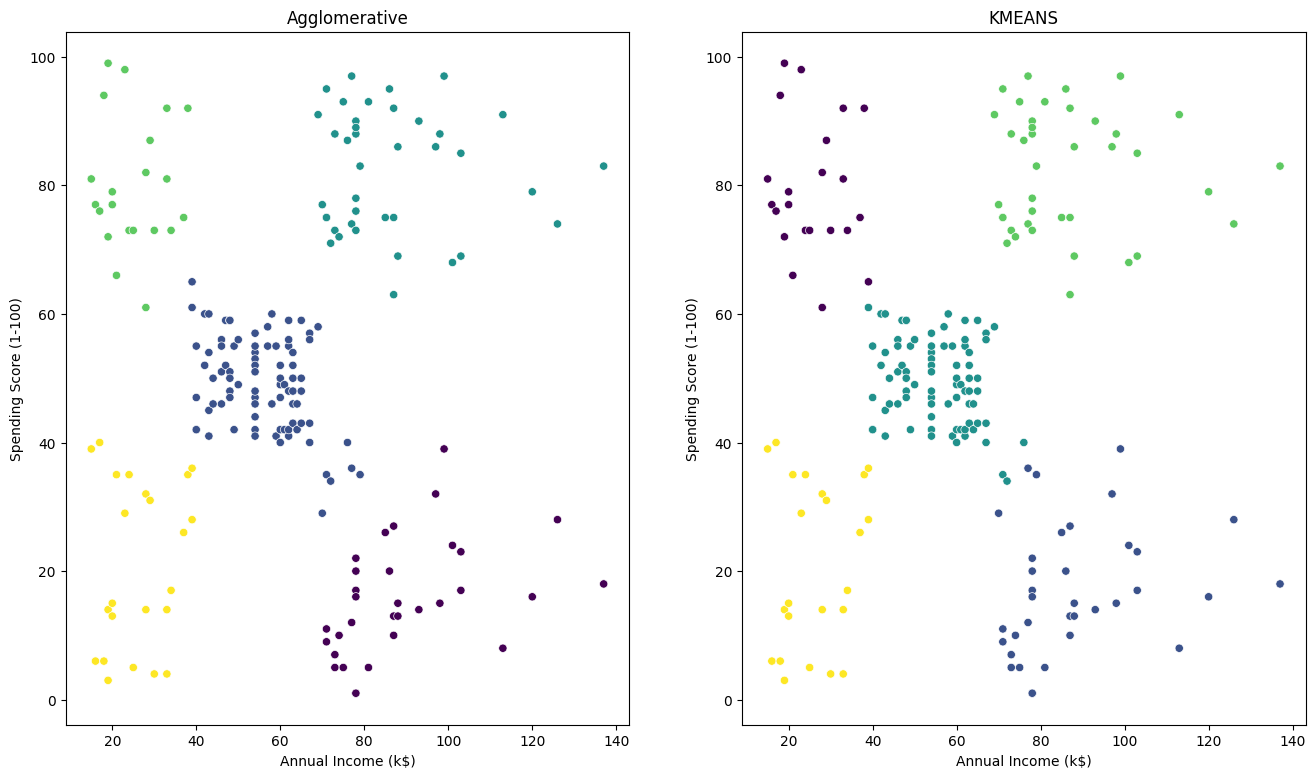

In [54]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'], c= alabels)

plt.subplot(1,2,2)
plt.title('KMEANS')
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],c=labels )
sns.scatterplot(cent[:,0],cent[:,1], s=200, color='red')